###  Problem Statement: Employee Attrition Classification

 **Context**:  
Employee attrition is a major challenge for organizations, as it can lead to reduced productivity, increased recruitment and training costs, and loss of valuable skills. Understanding the factors that influence whether an employee stays or leaves helps organizations build effective retention strategies and improve workplace satisfaction.

This project focuses on predicting employee attrition based on demographic, job-related, and organizational attributes. Using a synthetic HR dataset with realistic employee profiles, the project provides a practical scenario for applying **classification algorithms**, **feature engineering**, and **data preprocessing** to derive insights that support **data-driven HR decision-making**.

---

###  Objective

To build a **machine learning model** that predicts whether an employee will **stay** or **leave** the company based on various HR and personal factors.

The target variable is the `Attrition` column, which includes:

* `'Left'` → Employee left the organization  
* `'Stayed'` → Employee stayed in the organization  

---

### 📊 Dataset Description


| **Feature**                 | **Type**        | **Description**                                                                 |
| --------------------------- | --------------- | ------------------------------------------------------------------------------- |
| **Employee ID**             | Integer         | Unique identifier assigned to each employee.                                    |
| **Age**                     | Integer         | Age of the employee.                                                            |
| **Gender**                  | Categorical     | Gender of the employee.                                                         |
| **Years at Company**        | Integer         | Number of years the employee has been working at the company.                   |
| **Job Role**                | Categorical     | Department or role of the employee.                                             |
| **Monthly Income**          | Integer         | Monthly salary of the employee in dollars.                                      |
| **Work-Life Balance**       | Categorical     | Employee’s perceived balance between work and personal life.                    |
| **Job Satisfaction**        | Categorical     | Employee’s satisfaction level with their job.                                   |
| **Performance Rating**      | Categorical     | Employee’s performance rating based on evaluations.                             |
| **Number of Promotions**    | Integer         | Total number of promotions received by the employee.                            |
| **Overtime**                | Categorical     | Indicates whether the employee works overtime.                                  |
| **Distance from Home**      | Integer         | Distance between the employee’s home and workplace (in miles).                  |
| **Education Level**         | Categorical     | Highest education qualification attained by the employee.                       |
| **Marital Status**          | Categorical     | Employee’s marital status.                                                      |
| **Number of Dependents**    | Integer         | Number of dependents supported by the employee.                                 |
| **Job Level**               | Categorical     | Level of the employee’s position in the organization.                           |
| **Company Size**            | Categorical     | Size of the company where the employee works.                                   |
| **Company Tenure**          | Integer         | Total number of years the employee has been working in the industry.            |
| **Remote Work**             | Categorical     | Indicates whether the employee works remotely.                                  |
| **Leadership Opportunities**| Categorical     | Indicates if the employee has leadership opportunities.                         |
| **Innovation Opportunities**| Categorical     | Indicates if the employee has opportunities for innovation.                     |
| **Company Reputation**      | Categorical     | Employee’s perception of the company’s reputation.                              |
| **Employee Recognition**    | Categorical     | Level of recognition received by the employee.                                  |
| **Attrition**               | Categorical | Indicates whether the employee stayed or left the company.                      |

---




###  Approach

#### Data Preprocessing

* Handle missing values if present.  
* Encode categorical features using label encoding, ordinal encoding or one-hot encoding.  
* Scale numerical features like `Age`, `Monthly Income`, `Distance from Home`, etc.  
* Detect and treat outliers to ensure model stability.  
* Split data into **training** and **testing** sets.  

####  Model Training

* Train and compare multiple classification models:
  * **Logistic Regression**
  * **Decision Tree Classifier**
  * **Random Forest Classifier**
* Perform **hyperparameter tuning** using cross-validation to improve accuracy.

#### Model Evaluation

* Evaluate model performance using:
  * **Accuracy**
  * **Precision**
  * **Recall**
  * **F1-Score**
  * **Confusion Matrix**
* Compare model results to identify the best-performing algorithm.

####  (Optional) Deployment

* Build a **Streamlit web app** to allow HR users to:
  * Input employee details (e.g., salary, job satisfaction, etc.)  
  * Predict whether the employee is likely to leave or stay.  
  * Visualize key factors influencing attrition.  


## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import optuna
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [3]:
data = pd.read_csv(r"C:\Users\Bhanu Prakash\Downloads\archive (1)\train.csv")
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


### Inspect the Dataset

In [5]:
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
data.tail()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left
59597,15796,56,Male,19,Technology,6660,Good,High,Average,0,...,3,Mid,Medium,81,No,No,No,Good,Low,Stayed


In [8]:
data.shape

(59598, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [7]:
data.dtypes

Employee ID                  int64
Age                          int64
Gender                      object
Years at Company             int64
Job Role                    object
Monthly Income               int64
Work-Life Balance           object
Job Satisfaction            object
Performance Rating          object
Number of Promotions         int64
Overtime                    object
Distance from Home           int64
Education Level             object
Marital Status              object
Number of Dependents         int64
Job Level                   object
Company Size                object
Company Tenure               int64
Remote Work                 object
Leadership Opportunities    object
Innovation Opportunities    object
Company Reputation          object
Employee Recognition        object
Attrition                   object
dtype: object

### Removing unneccessary columns

In [4]:
data.drop(['Employee ID'],axis = 1,inplace = True)

### Handling missing values

In [5]:
data.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

* We checked the dataset for missing values and found **none**.  
  All the data is complete, so no cleaning was needed.

### Handling duplicates

In [10]:
data.duplicated().sum()

0

* We checked the dataset for duplicate records and found **none**.  
  All entries are unique, so no duplicates needed to be removed.

## Exploratory Data Analysis

### Univariate Non-Visual Analysis

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,59598.0,38.565875,12.079673,18.0,28.0,39.0,49.0,59.0
Years at Company,59598.0,15.753901,11.245981,1.0,7.0,13.0,23.0,51.0
Monthly Income,59598.0,7302.397983,2151.457423,1316.0,5658.0,7354.0,8880.0,16149.0
Number of Promotions,59598.0,0.832578,0.994991,0.0,0.0,1.0,2.0,4.0
Distance from Home,59598.0,50.007651,28.466459,1.0,25.0,50.0,75.0,99.0
Number of Dependents,59598.0,1.648075,1.555689,0.0,0.0,1.0,3.0,6.0
Company Tenure,59598.0,55.758415,25.411090,2.0,36.0,56.0,76.0,128.0



**Observations:**  
* The average employee is 38-39 years old and has spent around 15-16 years at the company.  
* Monthly income varies widely, from 1,316  to 16,149 dollars.  
* Most employees have 0-2 promotions, with very few reaching 4 promotions.  
* The average distance from home is about 50 miles, and employees typically have 1-2 dependents.  
* Company tenure ranges broadly, indicating a mix of new and very experienced employees.


In [13]:
data.describe(include = 'object').T

,count,unique,top,freq
Gender,59598,2,Male,32739
Job Role,59598,5,Technology,15507
Work-Life Balance,59598,4,Good,22528
Job Satisfaction,59598,4,High,29779
Performance Rating,59598,4,Average,35810
Overtime,59598,2,No,40148
Education Level,59598,5,Bachelor’s Degree,17826
Marital Status,59598,3,Married,29908
Job Level,59598,3,Entry,23867
Company Size,59598,3,Medium,29745


 **Observations:**  
* Most employees are **Male** and work in the **Technology** department.  
* Work-Life Balance is mostly rated **Good**, and Job Satisfaction is mostly **High**.  
* The majority of employees do **not work overtime** and **do not work remotely**.  
* Leadership and Innovation opportunities are limited for most employees.  
* Company Reputation is generally rated **Good**, while Employee Recognition is often **Low**.  
* The target variable shows a fairly balanced distribution with slightly more employees **staying** than leaving.


### Unique Values in Categorical Columns

In [12]:
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"Unique values in column '{col}': {data[col].unique()}")
    print(f"Number of unique categories in '{col}': {data[col].nunique()}")
    print()

Unique values in column 'Gender': ['Male' 'Female']
Number of unique categories in 'Gender': 2

Unique values in column 'Job Role': ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Number of unique categories in 'Job Role': 5

Unique values in column 'Work-Life Balance': ['Excellent' 'Poor' 'Good' 'Fair']
Number of unique categories in 'Work-Life Balance': 4

Unique values in column 'Job Satisfaction': ['Medium' 'High' 'Very High' 'Low']
Number of unique categories in 'Job Satisfaction': 4

Unique values in column 'Performance Rating': ['Average' 'Low' 'High' 'Below Average']
Number of unique categories in 'Performance Rating': 4

Unique values in column 'Overtime': ['No' 'Yes']
Number of unique categories in 'Overtime': 2

Unique values in column 'Education Level': ['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD']
Number of unique categories in 'Education Level': 5

Unique values in column 'Marital Status': ['Married' 'Divorced' 'Single']
Number 

### Unique Values in Categorical Columns

Below is a summary of the unique values in each categorical column. Understanding these values helps in choosing appropriate encoding techniques for modeling.

| Column                     | Unique Values                                              | Number of Categories |
| -------------------------- | ---------------------------------------------------------- | ------------------ |
| Gender                     | Male, Female                                               | 2                  |
| Job Role                   | Education, Media, Healthcare, Technology, Finance         | 5                  |
| Work-Life Balance          | Excellent, Poor, Good, Fair                                 | 4                  |
| Job Satisfaction           | Medium, High, Very High, Low                               | 4                  |
| Performance Rating         | Average, Low, High, Below Average                          | 4                  |
| Overtime                   | No, Yes                                                    | 2                  |
| Education Level            | Associate Degree, Master’s Degree, Bachelor’s Degree, High School, PhD | 5 |
| Marital Status             | Married, Divorced, Single                                  | 3                  |
| Job Level                  | Mid, Senior, Entry                                         | 3                  |
| Company Size               | Medium, Small, Large                                       | 3                  |
| Remote Work                | No, Yes                                                    | 2                  |
| Leadership Opportunities   | No, Yes                                                    | 2                  |
| Innovation Opportunities   | No, Yes                                                    | 2                  |
| Company Reputation         | Excellent, Fair, Poor, Good                                 | 4                  |
| Employee Recognition       | Medium, Low, High, Very High                                | 4                  |
| Attrition                  | Stayed, Left                                               | 2                  |

* We examined all categorical columns to identify their unique values and the number of categories. This is important for preprocessing, such as encoding categorical variables for machine learning models.


### Distribution of Target Variable

<AxesSubplot:xlabel='Attrition', ylabel='count'>

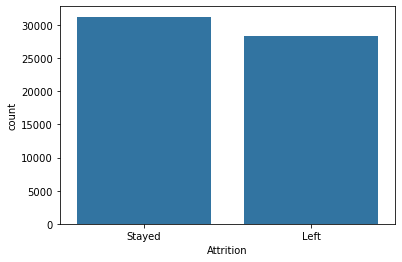

In [13]:
sns.countplot(x=data['Attrition'])

In [14]:
print("Attrition Distribution:")
print(data["Attrition"].value_counts())

Attrition Distribution:
Stayed    31260
Left      28338
Name: Attrition, dtype: int64


In [15]:
data["Attrition"].value_counts(normalize=True)

Stayed    0.524514
Left      0.475486
Name: Attrition, dtype: float64

**Observations:**  
* The dataset shows a fairly balanced distribution between employees who stayed and those who left.  
* With 52% stayed and 48% left, there is **no significant class imbalance**, making it suitable for training classification models without bias toward any class.


### Univariate Analysis for Numerical Columns

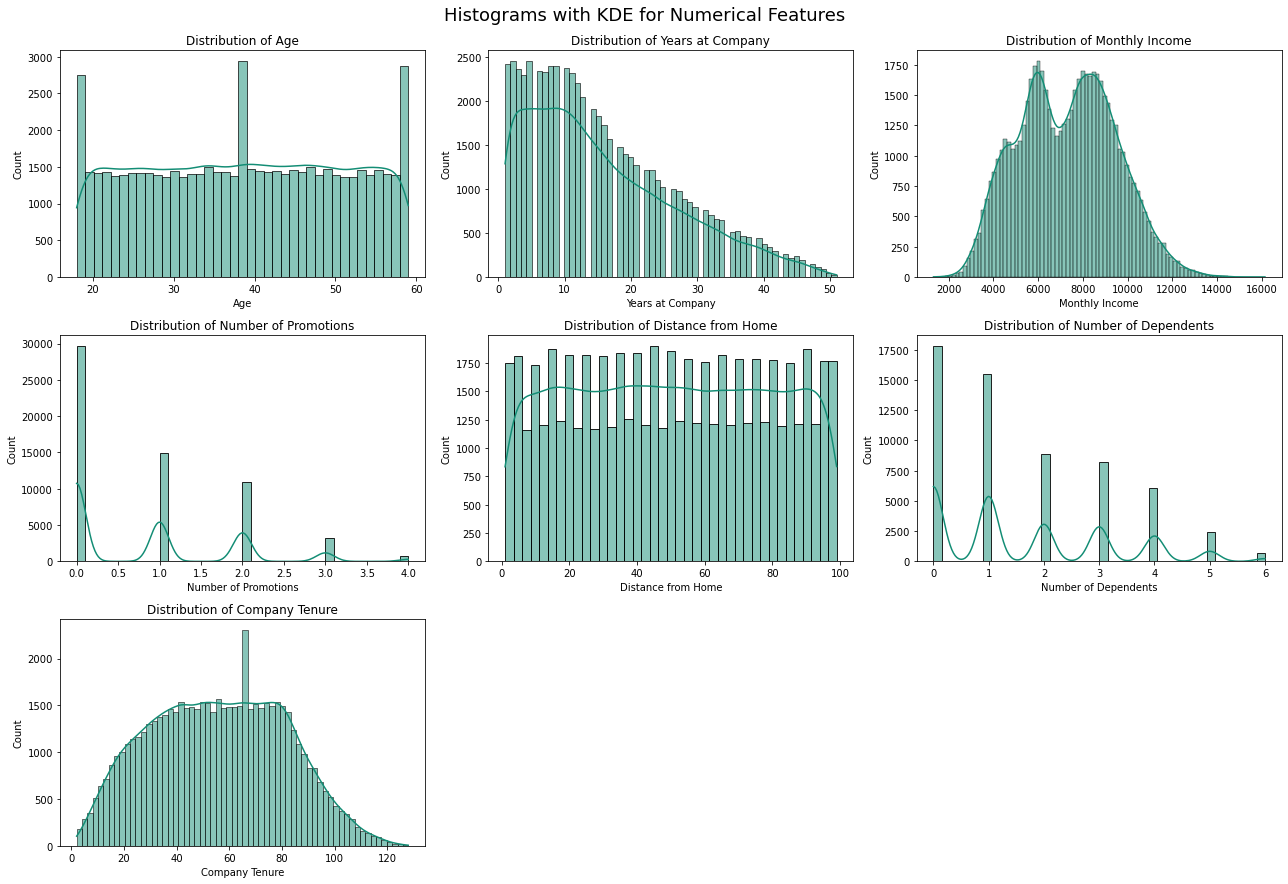

In [16]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(18, 12))
for i, col in enumerate(iterable=numerical_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True, color='#138d75')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.suptitle('Histograms with KDE for Numerical Features', fontsize=18, y=1.02)
plt.show();

The histograms with KDE plots show the distribution of all numerical features in the dataset:

* **Age**: Most employees are between 25 and 50 years old, with a peak around 35-40.  
* **Years at Company**: Skewed slightly to the right; most employees have 1-25 years at the company, with fewer long-tenured employees.  
* **Monthly Income**: Right-skewed distribution; most employees earn between 5,000-9,000 dollars, with few high earners.  
* **Number of Promotions**: Most employees have 0-1 promotions; very few have 3 or more.  
* **Distance from Home**: Approximately uniform distribution between 0-100 miles, with a slight concentration around 25, 50, and 75 miles.  
* **Number of Dependents**: Most employees have 0-2 dependents; very few have 4-6 dependents.  
* **Company Tenure**: Right-skewed; majority have 10-80 years, with few extremely high values.  

**General Insight:**  
* Some features show **skewness** (e.g., Monthly Income, Company Tenure), which may require scaling or transformation before modeling.  
* The distributions highlight potential **outliers** and differences in scale across numerical features, which can influence model performance if not addressed.


### Univariate Analysis for Categorical Columns

In [17]:
object_data = data.select_dtypes(include = 'object')

In [18]:
def Visualize(column_name, data):
    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index

    color = sns.color_palette('RdBu')
    plt.figure(figsize=(7,5))
    plt.suptitle(f"{column_name}", fontsize=16, fontweight='bold')  # <-- Added title only

    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index, autopct='%1.1f%%', colors=color)

    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show() 

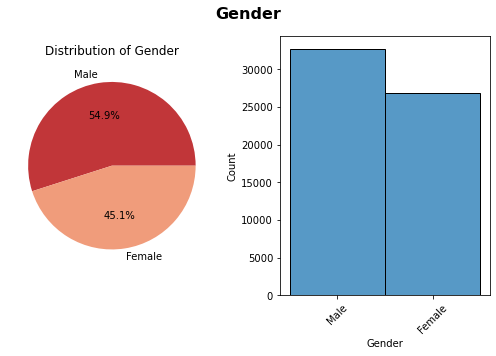

Male      32739
Female    26859
Name: Gender, dtype: int64


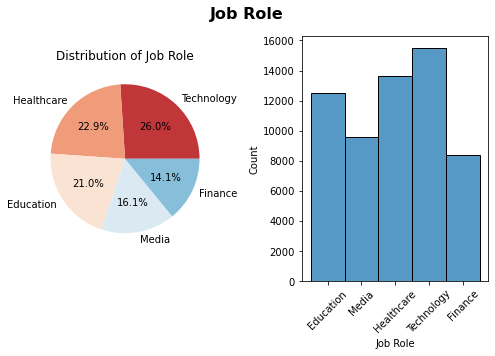

Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: Job Role, dtype: int64


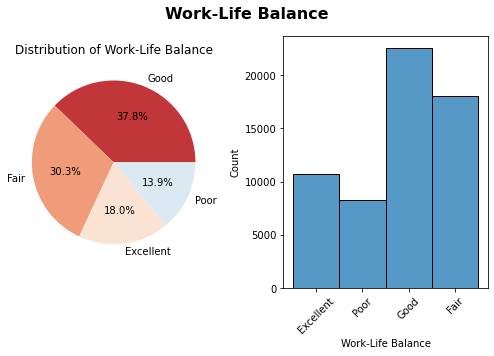

Good         22528
Fair         18046
Excellent    10719
Poor          8305
Name: Work-Life Balance, dtype: int64


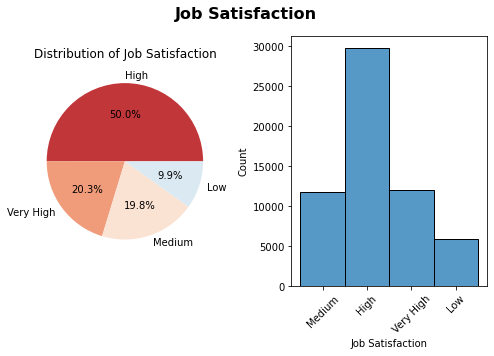

High         29779
Very High    12111
Medium       11817
Low           5891
Name: Job Satisfaction, dtype: int64


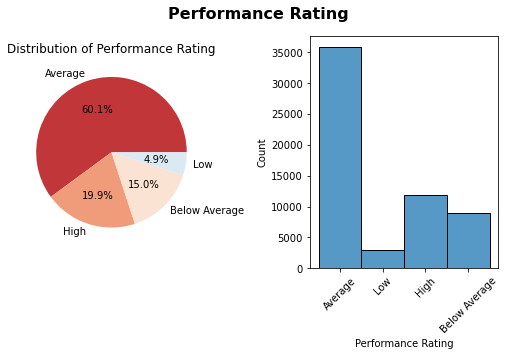

Average          35810
High             11888
Below Average     8950
Low               2950
Name: Performance Rating, dtype: int64


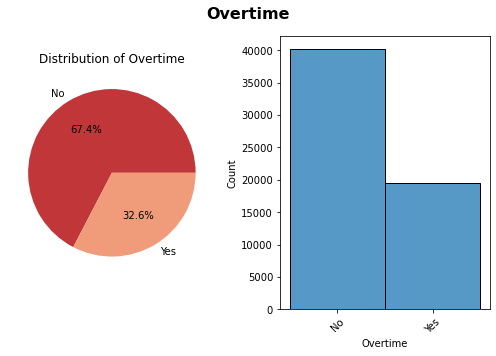

No     40148
Yes    19450
Name: Overtime, dtype: int64


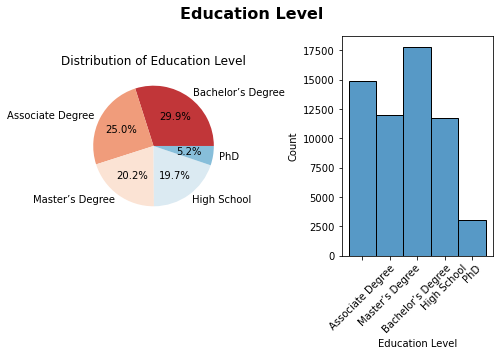

Bachelor’s Degree    17826
Associate Degree     14915
Master’s Degree      12020
High School          11748
PhD                   3089
Name: Education Level, dtype: int64


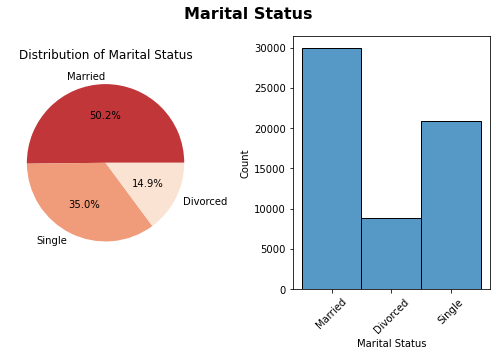

Married     29908
Single      20835
Divorced     8855
Name: Marital Status, dtype: int64


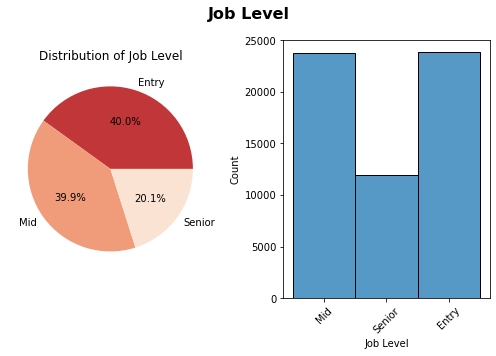

Entry     23867
Mid       23753
Senior    11978
Name: Job Level, dtype: int64


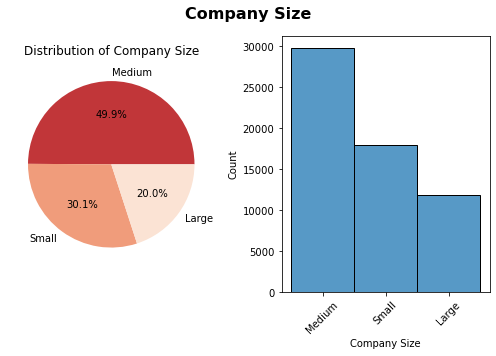

Medium    29745
Small     17935
Large     11918
Name: Company Size, dtype: int64


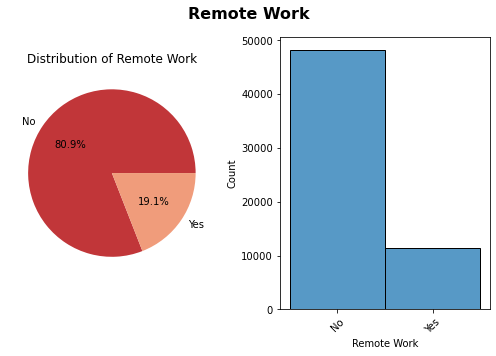

No     48239
Yes    11359
Name: Remote Work, dtype: int64


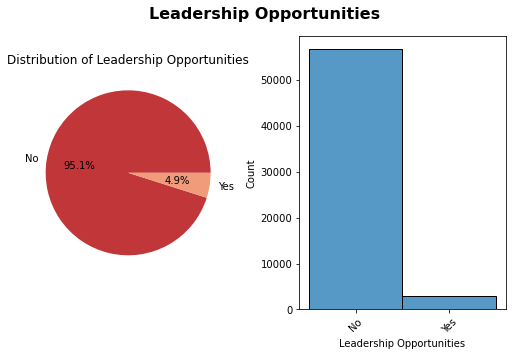

No     56680
Yes     2918
Name: Leadership Opportunities, dtype: int64


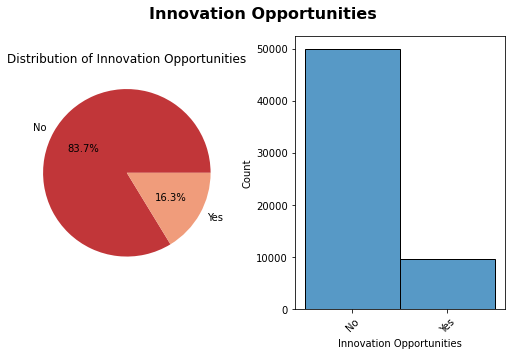

No     49895
Yes     9703
Name: Innovation Opportunities, dtype: int64


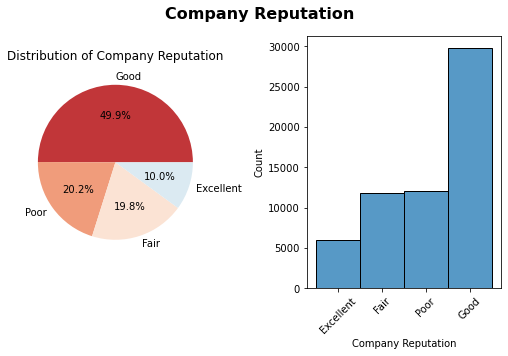

Good         29766
Poor         12034
Fair         11817
Excellent     5981
Name: Company Reputation, dtype: int64


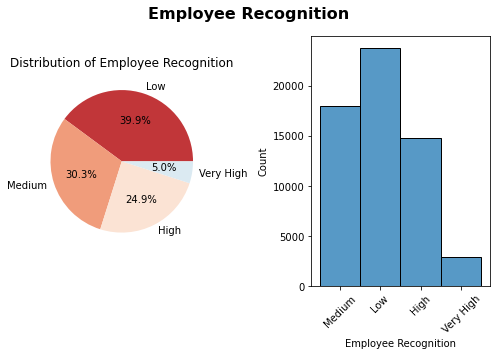

Low          23758
Medium       18033
High         14844
Very High     2963
Name: Employee Recognition, dtype: int64


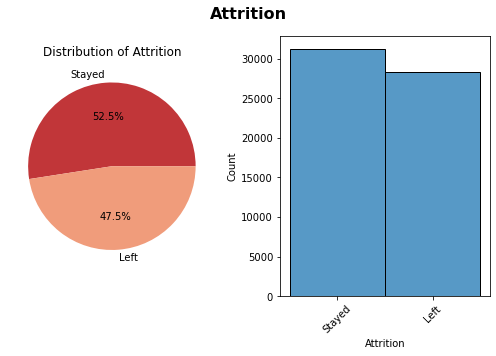

Stayed    31260
Left      28338
Name: Attrition, dtype: int64


In [19]:
for column in object_data:
    Visualize(column,data=data)
    print(data[column].value_counts())

### Bivariate Analysis for Categorical Columns

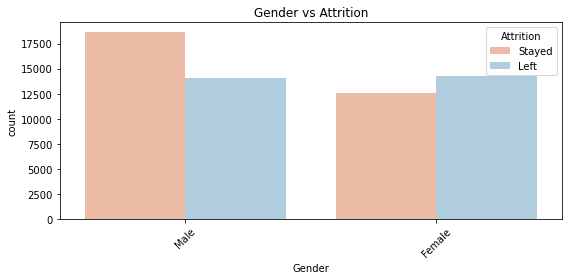

Attrition ratio by Gender (%):
Gender
Female    53.16
Male      42.94
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


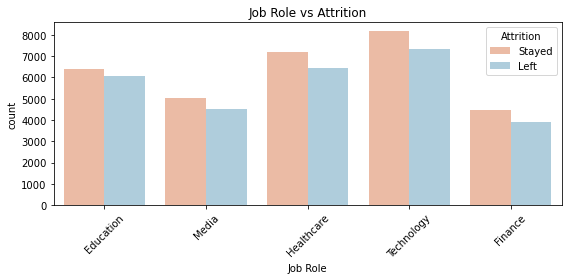

Attrition ratio by Job Role (%):
Job Role
Education     48.72
Finance       46.80
Healthcare    47.31
Media         47.44
Technology    47.29
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


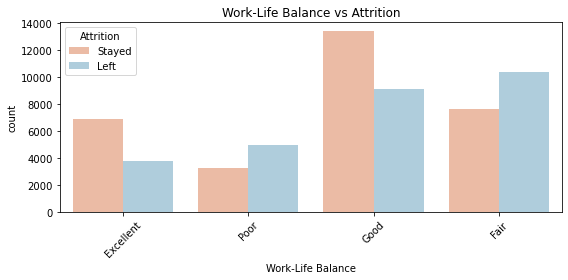

Attrition ratio by Work-Life Balance (%):
Work-Life Balance
Excellent    35.81
Fair         57.46
Good         40.56
Poor         60.11
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


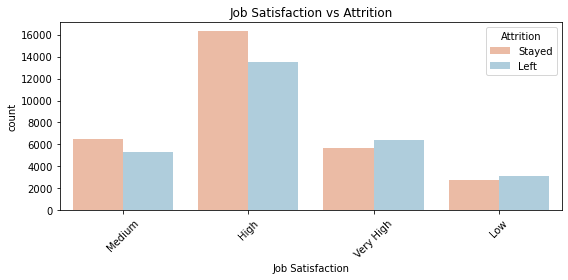

Attrition ratio by Job Satisfaction (%):
Job Satisfaction
High         45.30
Low          52.42
Medium       45.32
Very High    52.89
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


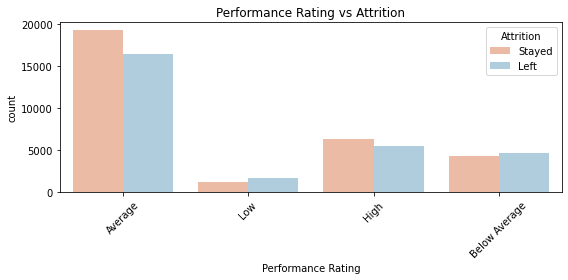

Attrition ratio by Performance Rating (%):
Performance Rating
Average          46.15
Below Average    51.81
High             46.07
Low              57.53
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


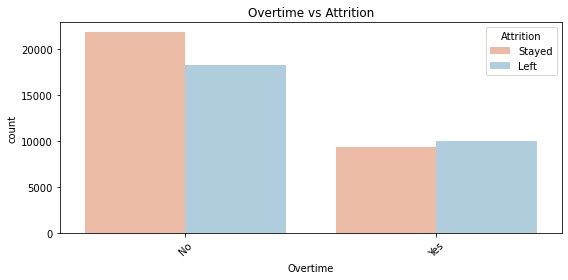

Attrition ratio by Overtime (%):
Overtime
No     45.61
Yes    51.54
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


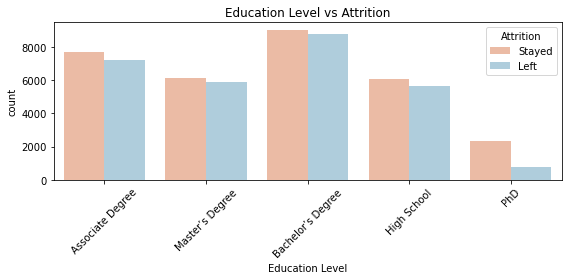

Attrition ratio by Education Level (%):
Education Level
Associate Degree     48.47
Bachelor’s Degree    49.32
High School          48.25
Master’s Degree      48.93
PhD                  24.86
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


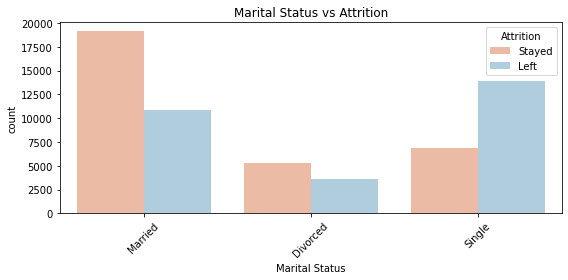

Attrition ratio by Marital Status (%):
Marital Status
Divorced    40.70
Married     36.15
Single      66.83
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


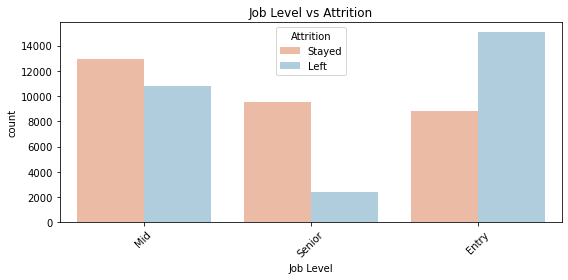

Attrition ratio by Job Level (%):
Job Level
Entry     63.19
Mid       45.56
Senior    20.31
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


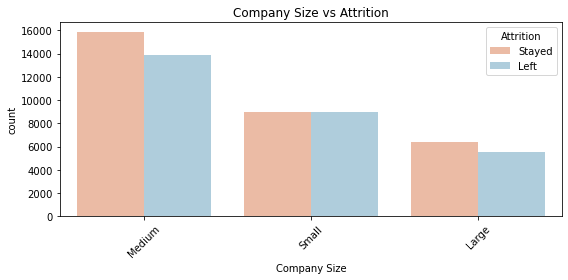

Attrition ratio by Company Size (%):
Company Size
Large     46.47
Medium    46.58
Small     49.87
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


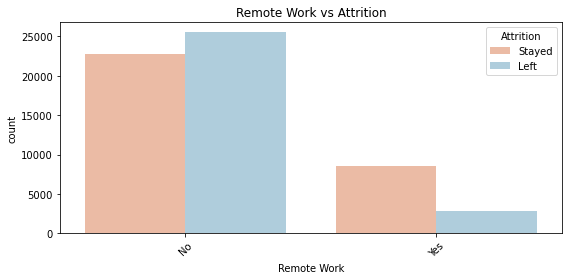

Attrition ratio by Remote Work (%):
Remote Work
No     52.89
Yes    24.86
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


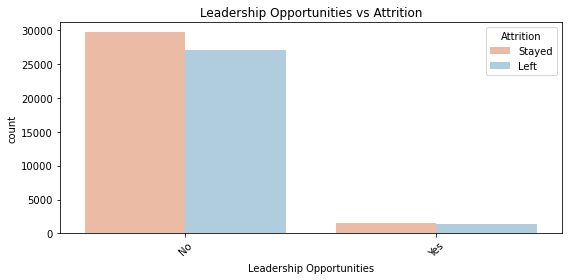

Attrition ratio by Leadership Opportunities (%):
Leadership Opportunities
No     47.66
Yes    45.31
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


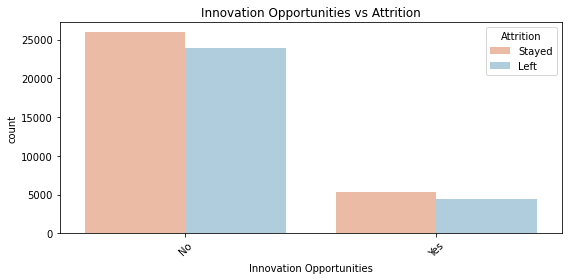

Attrition ratio by Innovation Opportunities (%):
Innovation Opportunities
No     48.02
Yes    45.11
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


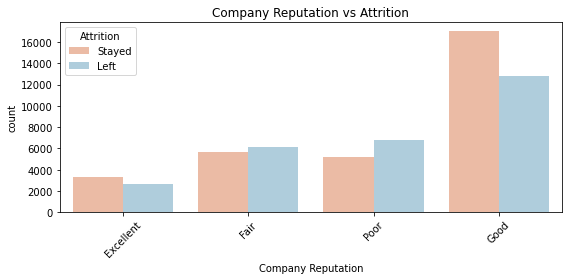

Attrition ratio by Company Reputation (%):
Company Reputation
Excellent    43.92
Fair         51.94
Good         42.91
Poor         56.50
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


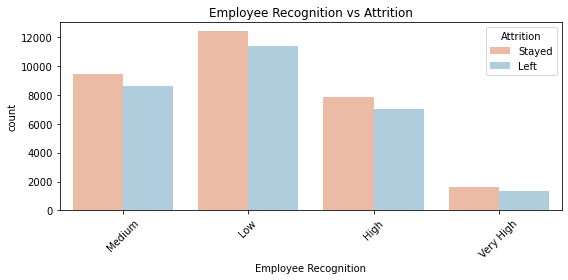

Attrition ratio by Employee Recognition (%):
Employee Recognition
High         47.18
Low          47.83
Medium       47.71
Very High    46.14
Name: Attrition_Ratio (%), dtype: float64
------------------------------------------------------------


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns (excluding Attrition itself)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.drop('Attrition')

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Attrition', data=data, palette='RdBu')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Optional: print attrition ratio per category
    counts = data.groupby([col, 'Attrition']).size().unstack(fill_value=0)
    counts['Attrition_Ratio (%)'] = counts['Left'] / counts.sum(axis=1) * 100
    print(f"Attrition ratio by {col} (%):\n{counts['Attrition_Ratio (%)'].round(2)}\n{'-'*60}")


### 📌 Insights from Attrition Ratios

Analyzing attrition ratios across different categorical features provides insights into which groups are more likely to leave the company.

**1. Gender:**  
* Females have a higher attrition ratio (53.16%) compared to males (42.94%).  
* Gender may have a moderate influence on attrition trends.

**2. Job Role:**  
* Attrition is fairly consistent across job roles (46-48%), with Education slightly higher (48.72%).  
* Job role alone does not show a strong effect on leaving.

**3. Work-Life Balance:**  
* Employees with **Poor (60.11%)** or **Fair (57.46%)** work-life balance have significantly higher attrition.  
* Good or Excellent work-life balance correlates with lower attrition.

**4. Job Satisfaction:**  
* Low (52.42%) and Very High (52.89%) satisfaction levels show higher attrition, while Medium and High are lower (~45%).  

**5. Performance Rating:**  
* Low (57.53%) and Below Average (51.81%) performers leave more often.  
* High and Average performers have lower attrition (~46%).  

**6. Overtime:**  
* Employees who work overtime (51.54%) are more likely to leave than those who do not (45.61%).  

**7. Education Level:**  
* Attrition is relatively similar across most education levels (48–49%), except PhD holders, who have a much lower attrition (24.86%).  

**8. Marital Status:**  
* Singles (66.83%) leave much more frequently than Married (36.15%) or Divorced (40.70%) employees.  

**9. Job Level:**  
* Entry-level employees have the highest attrition (63.19%), while senior-level employees leave the least (20.31%).  

**10. Company Size:**  
* Attrition is slightly higher in small companies (49.87%) compared to medium (46.58%) and large (46.47%) organizations.  

**11. Remote Work:**  
* Employees working remotely have much lower attrition (24.86%) than those working on-site (52.89%).  

**12. Leadership & Innovation Opportunities:**  
* Lack of leadership (47.66%) or innovation (48.02%) opportunities slightly increases attrition.  
* Availability of such opportunities slightly reduces attrition (45–46%).  

**13. Company Reputation:**  
* Poor (56.50%) and Fair (51.94%) company reputation correlates with higher attrition.  
* Excellent (43.92%) and Good (42.91%) reputations help retain employees.  

**14. Employee Recognition:**  
* Attrition is fairly uniform across recognition levels (46-48%), suggesting recognition alone has a mild effect.  

**Key Takeaways:**  
* **Work-Life Balance, Job Level, Marital Status, and Remote Work** are among the strongest factors influencing attrition.  
* Entry-level, single employees, or those with poor work-life balance are at the highest risk of leaving.  
* Company reputation, leadership, and innovation opportunities moderately influence retention.  
* Gender and education level have minor but noticeable effects on attrition trends.


###  Correlation analysis for numerical variables

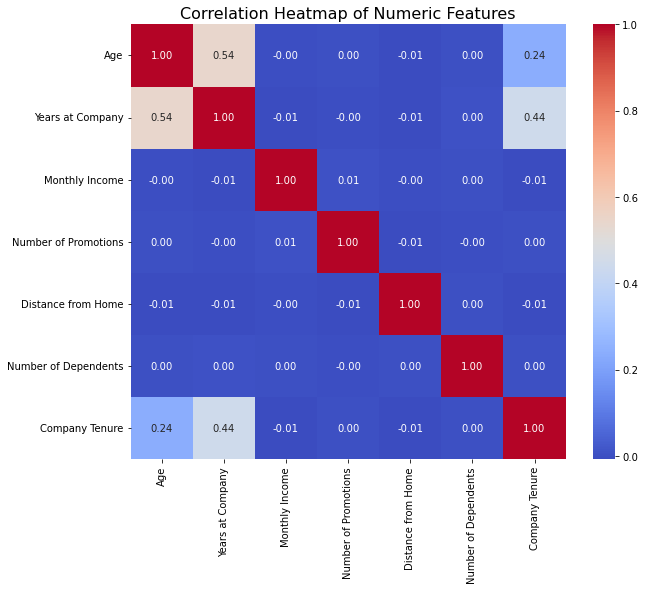

In [18]:
numeric_cols = data.select_dtypes(include=np.number).columns

# Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

### Distribution and Outlier Analysis of Numerical Features

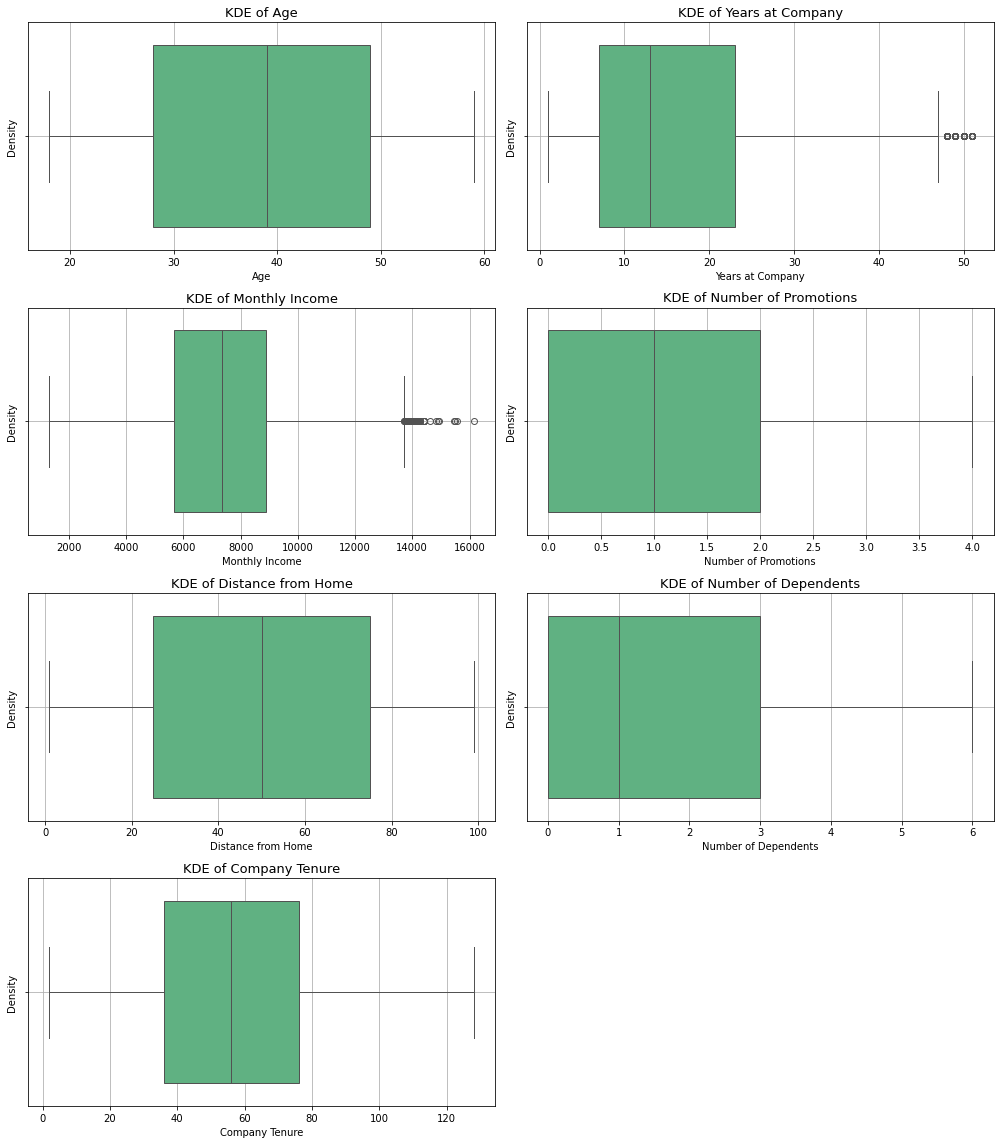

In [17]:
numerical_cols = data.select_dtypes(include='number').columns

n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(14, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x =data[col],  color='#52be80')
    plt.title(f"KDE of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True)

plt.tight_layout()
plt.show();

### Feature selection

In [19]:
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

### Identifying Significant Numerical Features using ANOVA test

In [20]:
num_cols = data.select_dtypes(np.number).columns

In [21]:
new_df = data.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"Stayed":0,"Left":1})

In [22]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

In [23]:
keys = list(f_scores.keys())
values = list(f_scores.values())
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]

In [24]:
test_df

,Features,F_Score,P_value
0,Age,591575.911663,0.00000000000000000000
1,Years at Company,109783.737559,0.00000000000000000000
2,Monthly Income,686500.074587,0.00000000000000000000
3,Number of Promotions,6131.659111,0.00000000000000000000
4,Distance from Home,180387.224558,0.00000000000000000000
5,Number of Dependents,30696.040497,0.00000000000000000000
6,Company Tenure,281967.785693,0.00000000000000000000


**Key Insights:**
* All numerical features have **very low p-values (< 0.05)**, indicating they are significantly associated with attrition.  
* Features like **Monthly Income, Age, Company Tenure, and Distance from Home** have extremely high F-scores, suggesting they are **strong predictors** of attrition.  
* Features like **Number of Promotions** and **Number of Dependents** also influence attrition but have comparatively lower F-scores.  
* These numerical features should be **included in the predictive model** for better performance.

### Identifying Significant Categorical Features with Chi-Square test

In [25]:
cat_cols = data.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [26]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(data[col], data['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

In [27]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]

In [28]:
test_df

,Features,Chi_2 Statistic,P_value
0,Gender,617.525453,0.00000000000000000000
1,Job Role,9.532499,0.04908373105379261470
2,Work-Life Balance,2269.835437,0.00000000000000000000
3,Job Satisfaction,278.328041,0.00000000000000000000
4,Performance Rating,221.313453,0.00000000000000000000
5,Overtime,184.422905,0.00000000000000000000
6,Education Level,676.344622,0.00000000000000000000
7,Marital Status,4829.526564,0.00000000000000000000
8,Job Level,5942.092180,0.00000000000000000000
9,Company Size,55.696606,0.00000000000080470292


**Key Insights:**
* Features like **Job Level, Marital Status, Remote Work, Work-Life Balance**, and **Gender** have a strong association with attrition.  
* **Employee Recognition** is not significantly associated with attrition.  
* Features with very low p-values (< 0.05) can be considered **important categorical predictors** for modeling.  
* Features with higher p-values (like Employee Recognition) can potentially be **excluded** from the model without losing predictive power.

In [5]:
data.drop('Employee Recognition',axis=1,inplace=True)

### Splitting the dataset into X(Feature Variables) and Y(Target Variable)

In [9]:
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

In [10]:
y_encoded = y.replace({'Stayed': 0, 'Left': 1}).values

### Splitting the data into training and testing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


### Feature scaling for Random Forest and Decision Tree

In [16]:
cat_vars = ['Gender', 'Job Role', 'Marital Status', 'Company Size',
            'Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']

ordinal_cols = ['Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
                'Education Level', 'Job Level', 'Company Reputation']

ordinal_mapping = [
    ['Poor', 'Fair', 'Good', 'Excellent'],                      # Work-Life Balance
    ['Low', 'Medium', 'High', 'Very High'],                     # Job Satisfaction
    ['Low', 'Below Average', 'Average', 'High'],               # Performance Rating
    ['High School', 'Associate Degree', "Bachelor’s Degree", "Master’s Degree", "PhD"], # Education Level
    ['Entry', 'Mid', 'Senior'],                                # Job Level
    ['Poor', 'Fair', 'Good', 'Excellent']                   # Company Reputation
   
]

ct = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first', sparse_output=False), cat_vars),
    ('ordinal', OrdinalEncoder(categories=ordinal_mapping), ordinal_cols)
], remainder='passthrough', verbose_feature_names_out=False)


### Random Forest

#### Hyperparameter Optimization of Random Forest using Optuna

In [28]:
def objective_rf(trial):
    # Suggest hyperparameters for Random Forest
    rf = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 100, 500),
        max_depth=trial.suggest_int('max_depth', 5, 50),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20),
        max_features=trial.suggest_categorical('max_features', ['sqrt','log2', None]),
        random_state=42,
        n_jobs=-1
    )
    
    # Pipeline with preprocessing
    pipeline = Pipeline([
        ('preprocessor', ct),  # ColumnTransformer for encoding
        ('classifier', rf)
    ])
    
    # Stratified 5-fold CV on training set
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Optimize for recall (positive class = 1, i.e., Left)
    scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring=make_scorer(recall_score, pos_label=1),
        n_jobs=-1
    )
    
    return scores.mean()

# Create Optuna study and optimize
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

print("Best Recall (Random Forest):", study_rf.best_value)
print("Best Hyperparameters (Random Forest):", study_rf.best_params)

[I 2025-10-19 15:19:41,188] A new study created in memory with name: no-name-a311b5f4-7de5-4df3-8e0a-5c94c1f84817
[I 2025-10-19 15:20:37,792] Trial 0 finished with value: 0.7305249228054698 and parameters: {'n_estimators': 397, 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7305249228054698.
[I 2025-10-19 15:21:32,923] Trial 1 finished with value: 0.7301279223643582 and parameters: {'n_estimators': 336, 'max_depth': 27, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7305249228054698.
[I 2025-10-19 15:21:46,385] Trial 2 finished with value: 0.6937803264225849 and parameters: {'n_estimators': 130, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7305249228054698.
[I 2025-10-19 15:23:01,723] Trial 3 finished with value: 0.7330833700926334 and parameters: {'n_estimators': 126, 'max_depth': 50, '

Best Recall (Random Forest): 0.771018967798853
Best Hyperparameters (Random Forest): {'n_estimators': 425, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': None}


### Random Forest Model Training and Prediction

In [29]:
final_rf = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
final_pipeline = Pipeline([
    ('preprocessor', ct),
    ('classifier', final_rf)
])

final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)

#### Random Forest Model Evaluation

In [30]:
print("Final Accuracy:", accuracy_score(y_test_final, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test_final, y_pred_final))
print("Classification Report:\n", classification_report(y_test_final, y_pred_final))

Final Accuracy: 0.7361577181208053
Confusion Matrix:
 [[4712 1540]
 [1605 4063]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      6252
           1       0.73      0.72      0.72      5668

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920



#### Feature Importances from Random Forest Classifier

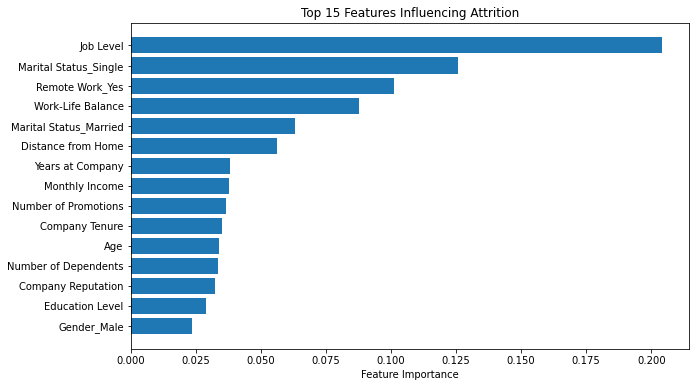

In [31]:
feature_names = final_pipeline['preprocessor'].get_feature_names_out()
importances = final_pipeline['classifier'].feature_importances_


indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.barh(range(15), importances[indices[:15]])
plt.yticks(range(15), [feature_names[i] for i in indices[:15]])
plt.xlabel('Feature Importance')
plt.title('Top 15 Features Influencing Attrition')
plt.gca().invert_yaxis()
plt.show()

### Decision Tree

#### Hyperparameter Optimization of Decision Tree using Optuna

In [24]:
from sklearn.metrics import make_scorer, recall_score

def objective_dt(trial):
    # Suggest hyperparameters for Decision Tree
    dt = DecisionTreeClassifier(
        criterion=trial.suggest_categorical('criterion', ['gini', 'entropy']),
        max_depth=trial.suggest_int('max_depth', 5, 50),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20),
        max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        random_state=42
    )
    
    # Pipeline with preprocessing
    pipeline = Pipeline([
        ('preprocessor', ct),
        ('classifier', dt)
    ])
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring=make_scorer(recall_score, pos_label=1),
        n_jobs=-1
    )
    
    return scores.mean()

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=50)

print("Best Recall (Decision Tree):", study_dt.best_value)
print("Best Hyperparameters (Decision Tree):", study_dt.best_params)

[I 2025-10-19 15:07:56,742] A new study created in memory with name: no-name-c1b74f17-593d-4e68-a8ea-b2385ea1ff2b
[I 2025-10-19 15:07:59,337] Trial 0 finished with value: 0.6336568151742391 and parameters: {'criterion': 'gini', 'max_depth': 45, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6336568151742391.
[I 2025-10-19 15:08:01,415] Trial 1 finished with value: 0.6344067048963388 and parameters: {'criterion': 'gini', 'max_depth': 44, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 1 with value: 0.6344067048963388.
[I 2025-10-19 15:08:02,097] Trial 2 finished with value: 0.6599029554477284 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.6599029554477284.
[I 2025-10-19 15:08:03,067] Trial 3 finished with value: 0.6727834142037936 and parameters: {'criterion': 'entropy', 'max_depth': 

Best Recall (Decision Tree): 0.7924569916188795
Best Hyperparameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': None}


####  Decision Tree Model Training and Prediction

In [25]:
final_dt = DecisionTreeClassifier(**study_dt.best_params, random_state=42)
final_pipeline = Pipeline([
    ('preprocessor', ct),
    ('classifier', final_dt)
])

final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)

#### Decision Tree Model Evaluation

In [26]:
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Final Accuracy: 0.7232382550335571
Confusion Matrix:
 [[4144 2108]
 [1191 4477]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.66      0.72      6252
           1       0.68      0.79      0.73      5668

    accuracy                           0.72     11920
   macro avg       0.73      0.73      0.72     11920
weighted avg       0.73      0.72      0.72     11920



### Segregate the Inputs and Output

In [69]:
X = data.drop('Attrition', axis = 1)
y = data['Attrition']
X.shape, y.shape

((59598, 21), (59598,))

In [70]:
y_encoded = y.replace({'Stayed': 0, 'Left': 1}).values

### Split the data into Training and Testing Data

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,stratify=y_encoded, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47678, 21), (11920, 21), (47678,), (11920,))

### Feature Scaling for Logistic Regression

In [72]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer


cat_vars = ['Gender', 'Job Role', 'Marital Status', 'Company Size',
            'Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']


ordinal_cols = ['Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
                'Education Level', 'Job Level', 'Company Reputation']

# Define the order for each ordinal column
ordinal_mapping = [
    ['Poor', 'Fair', 'Good', 'Excellent'],                      # Work-Life Balance
    ['Low', 'Medium', 'High', 'Very High'],                     # Job Satisfaction
    ['Low', 'Below Average', 'Average', 'High'],               # Performance Rating
    ['High School', 'Associate Degree', 'Bachelor’s Degree', 'Master’s Degree', 'PhD'], # Education Level
    ['Entry', 'Mid', 'Senior'],                                # Job Level
    ['Poor', 'Fair', 'Good', 'Excellent']                   # Company Reputation
    
]

# Numeric variables → Scaling
num_vars = ['Age', 'Years at Company', 'Monthly Income', 'Distance from Home', 
            'Number of Promotions', 'Number of Dependents', 'Company Tenure']


ohe = OneHotEncoder(drop='first', sparse_output=False)
ordinal_enc = OrdinalEncoder(categories=ordinal_mapping)
scaler = StandardScaler()

ct = ColumnTransformer(
    transformers=[
        ('ohe', ohe, cat_vars),
        ('ordinal', ordinal_enc, ordinal_cols),
        ('scaler', scaler, num_vars)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    force_int_remainder_cols=False
).set_output(transform='pandas')  


In [56]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

def objective(trial):
    # Suggest hyperparameters
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
    solver = 'liblinear' if penalty in ['l1', 'l2'] else 'saga'
    C = trial.suggest_float('C', 0.01, 10.0, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1) if penalty == 'elasticnet' else None

    # Logistic Regression with suggested hyperparameters
    clf = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        l1_ratio=l1_ratio,
        max_iter=1000,
        random_state=42
    )

    # Pipeline with preprocessing
    pipeline = Pipeline([
        ('preprocessor', ct),
        ('classifier', clf)
    ])

    # 5-fold Stratified CV using recall as scoring
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv,
                             scoring=make_scorer(recall_score), n_jobs=-1)
    return scores.mean()

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # You can increase n_trials for better search

print("Best Recall:", study.best_value)
print("Best Hyperparameters:", study.best_params)


[I 2025-10-19 17:42:44,014] A new study created in memory with name: no-name-75916e53-9596-4b3a-a243-95275e6533bb
[I 2025-10-19 17:42:47,170] Trial 0 finished with value: 0.7168504631671813 and parameters: {'penalty': 'elasticnet', 'C': 0.08940726600387734, 'l1_ratio': 0.36611243556544515}. Best is trial 0 with value: 0.7168504631671813.
[I 2025-10-19 17:42:49,108] Trial 1 finished with value: 0.709219232465814 and parameters: {'penalty': 'l2', 'C': 0.013535506186951965}. Best is trial 0 with value: 0.7168504631671813.
[I 2025-10-19 17:42:51,924] Trial 2 finished with value: 0.7173356859285398 and parameters: {'penalty': 'l1', 'C': 7.3680923994248655}. Best is trial 2 with value: 0.7173356859285398.
[I 2025-10-19 17:42:54,443] Trial 3 finished with value: 0.717247463608293 and parameters: {'penalty': 'elasticnet', 'C': 1.9977561337883372, 'l1_ratio': 0.7819326213362681}. Best is trial 2 with value: 0.7173356859285398.
[I 2025-10-19 17:42:57,358] Trial 4 finished with value: 0.711336568

Best Recall: 0.7173797970886634
Best Hyperparameters: {'penalty': 'l1', 'C': 9.829255557619971}


In [74]:
best_params = study.best_params
if best_params['penalty'] == 'elasticnet':
    final_clf = LogisticRegression(
        penalty='elasticnet',
        C=best_params['C'],
        solver='saga',
        l1_ratio=best_params['l1_ratio'],
        max_iter=1000,
        random_state=42
    )
else:
    final_clf = LogisticRegression(
        penalty=best_params['penalty'],
        C=best_params['C'],
        solver='liblinear',
        max_iter=1000,
        random_state=42
    )

pipeline_final = Pipeline([
    ('preprocessor', ct),
    ('classifier', final_clf)
])

# Fit and predict
pipeline_final.fit(X_train, y_train)
y_pred = pipeline_final.predict(X_test)

In [75]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))  
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7385067114093959
Recall: 0.7180663373323923

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      6252
           1       0.73      0.72      0.72      5668

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920


Confusion Matrix:
 [[4733 1519]
 [1598 4070]]


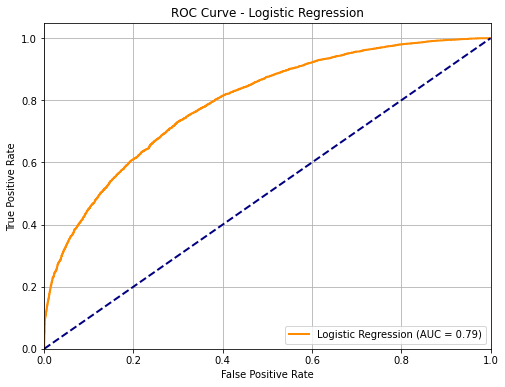

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1 = Left)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- Evaluated **Random Forest, Decision Tree, and Logistic Regression** for predicting employee attrition.  
- **Logistic Regression**:  
  - Highest overall accuracy (~73.8%).  
  - Balanced precision and recall - reliable for general predictions.  
- **Decision Tree**:  
  - Higher recall for employees likely to leave (~0.79).  
  - Useful for identifying at-risk employees, but more false positives.  
- **Random Forest**:  
  - Strong balance between accuracy and class-wise performance.  
- **Recommendations**:  
  - Use **Logistic Regression or Random Forest** for general deployment.  
  - Use **Decision Tree** if maximizing recall for attrition is the priority.  